In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# For Classification Data

In [34]:
x,y=make_moons(n_samples=1000,noise=0.3)
df=pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"label":y})
df

,x1,x2,label
0,0.921345,0.410707,0
1,-0.019439,1.070305,0
2,2.010240,0.641996,1
3,-0.721229,-0.111115,0
4,0.365803,0.433229,1
...,...,...,...
995,0.211212,-0.661305,1
996,0.144149,0.259096,1
997,-0.817569,0.094388,0
998,0.337656,0.157590,1


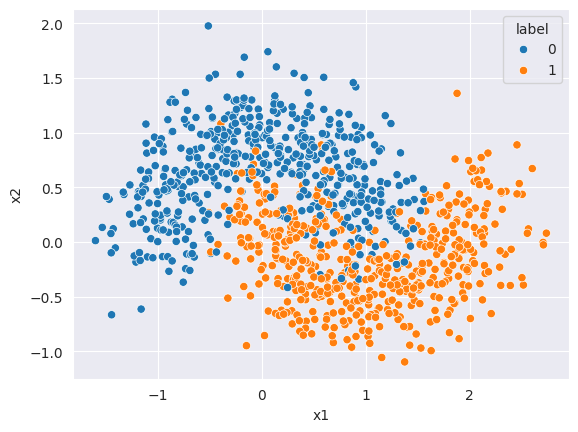

In [35]:
sns.scatterplot(x="x1",y="x2",hue="label",data=df)
plt.show()

In [36]:
x_a=df.iloc[:,:-1]
y_a=df['label']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test),dt.score(x_train,y_train)

(0.875, 1.0)

In [41]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test),sv.score(x_train,y_train)

(0.945, 0.915)

In [42]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_test,y_test),lg.score(x_train,y_train)

(0.855, 0.85875)

In [43]:
from sklearn.ensemble import VotingClassifier
lsd=[('dt',DecisionTreeClassifier()),('sv',SVC()),('lg',LogisticRegression())]

In [72]:
vc=VotingClassifier(lsd,voting='hard',weights=[10,2,10])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('sv', SVC()),
                             ('lg', LogisticRegression())],
                 weights=[10, 2, 10])

In [73]:
vc.score(x_test,y_test),vc.score(x_train,y_train)

(0.935, 0.9375)

# For Regression Data

In [86]:
data=pd.read_csv("/home/hammadali08/Vidoes/CSV file/Salary Data.csv")
data.drop(columns=['Age','Gender','Education Level','Job Title'],inplace=True)
data.dropna(inplace=True)
data

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


In [87]:
x_b=data.iloc[:,:-1]
y_b=data['Salary']

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_b,y_b,test_size=0.2,random_state=42)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [90]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test),lr.score(x_train,y_train)

(0.8991338517367767, 0.8564271861248008)

In [91]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test),knn.score(x_train,y_train)

(0.8914517588088742, 0.8610929720834829)

In [94]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test),dtr.score(x_train,y_train)

(0.8918371647646167, 0.8824759461541218)

In [95]:
from sklearn.ensemble import VotingRegressor

In [96]:
lkd=[('lr',LinearRegression()),('knn',KNeighborsRegressor()),('dtr',DecisionTreeRegressor())]

In [115]:
vr=VotingRegressor(lkd,weights=[2,10,20])
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('knn', KNeighborsRegressor()),
                            ('dtr', DecisionTreeRegressor())],
                weights=[2, 10, 20])

In [116]:
vr.score(x_test,y_test),vr.score(x_train,y_train)

(0.8959533512670247, 0.8797656375963377)